In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


class DataOperations:
    """
    * Bu class, verilen dataset hakkında analiz yapıp; bu dataset'in sayısal değerleri üzerinden görselleştirme yapmaktadır.
    ------------------------------------------------------------------------------------------------------------------------
    ### Kullanım:
    1- Argüman kullanmadan: Eğer argüman verilmezse, class'ta default olarak verilen
    dataset üzerinden işlemler yapılır. (bknz. DataOperations.analyze())
    
    2- Verilen argüman numpy array ise: Bu durumda girilen veri, pandas dataframe'e çevrilir.
    (bknz. DataOperations.analyze(np.random.randint(0,100,size=[10,10])))
    
    3- Verilen argüman pandas dataframe ise: Bu durumda argüman değiştirilmeden devam edilir.
    (bknz. DataOperations.analyze(pd.dataframe("x.csv"))
    
    4- Verilen argüman "CSV"-"JSON" türünde ise: Bu durumda veri okunur ve pandas dataframe'e çevrilir.
    (bknz. DataOperations.analyze(pd.read_json("x.json"))
    """
    
    dataframe = pd.DataFrame() #Önce boş bir dataframe oluşturdum. Zira diğer fonsiyonlarda buna erişebilmek için.
    
    def __init__(self, data = np.random.randint(0,100,size=[10,10])): #Burada default argüman olarak 10x10'lük bir random data oluşturdum.
        self.data = data
        
        #Bu kısımda eğer default data kullanılmıyosa, data türünü kontrol edip ona göre dataframe'e çevirme işlemi yaptım.
        if type(self.data) is np.ndarray:
            self.dataframe = pd.DataFrame(self.data)
        elif type(self.data) is pd.DataFrame:
            self.dataframe = self.data  
        elif type(self.data) is str:
            if self.data.endswith(".csv"):
                newData = pd.read_csv(self.data)
                self.dataframe = pd.DataFrame(newData)
            elif self.data.endswith(".json"):
                newData = pd.read_json(self.data)
                self.dataframe = pd.DataFrame(newData)
            else:  
                raise Exception("Yanlış girdi yapıldı.")                 
                #Bu kısım eğer parametre olarak yanlış string girdi yapılırsa gösterilecek çıktı.
        else: 
            raise Exception("Farklı bir dosya türü girdiniz.")
            #Bu kısım eğer parametre olarak farklı bir tür girdi yapılırsa gösterilecek çıktı.
        
    def analyze(self):
        """
        * Analyze fonksiyonu, tanımlanan dataframe hakkında bilgi almak için kullanılır. 
        --------------------------------------------------------------------------------
  
        - Bu fonksiyona herhangi bir argüman vermeden, class'ı çağırırken oluşturulan dataframe üzerinden analiz yapılır.
  
        Returns: dataframe.head(), dataframe.info(), dataframe.describe()
        """

        print("Data first 5 row:")
        print(self.dataframe.head())
        print("-"*25)
        print("Data Info:")
        print(self.dataframe.info())
        print("-"*25)
        print("Data Describe:")
        print(self.dataframe.describe().T)
        print("-"*25)

    def visualize(self):
        """
        * Visualize fonsiyonu, tanımlanan dataframe hakkında görsel bilgi almak için kulanılır.
        ---------------------------------------------------------------------------------------
        
        - Bu fonksiyona herhangi bir argüman vermeden, class'ı çağırırken oluşturulan dataframe üzerinden görselleştirme yapılır.
  
        Returns: Correlation Matrix(Heatmap), Histogram, Boxplot
        """
 
        print("Correlation Heatmap:")
        sns.set(rc={'figure.figsize': (15,10)})
        plt.title('Correlation Matrix')
        sns.heatmap(self.dataframe.corr(),annot=True)
            
        #Önce int ve float değerleri bulup, sonra bunları görselleştiriyorum.
        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
        numCols = self.dataframe.select_dtypes(include=numerics).columns
            
            
        f, axes = plt.subplots(len(numCols), 3, constrained_layout = True, figsize=([20,20]))    
        x = 0
        
        for col in numCols:
            sns.histplot(data=self.dataframe, x=col, kde=True, ax=axes[x,0])
            axes[x,0].set_xlabel(col)
            axes[x,0].set_ylabel('Count')
            axes[x,0].set_title(f"{col} Count")
            
            sns.boxplot(data=self.dataframe, x=col, ax=axes[x,1])
            axes[x,1].set_xlabel(col)
            axes[x,1].set_title(f"{col} Boxplot")
                
            sns.violinplot(x=self.dataframe[col], ax=axes[x,2])
            axes[x,2].set_xlabel(col)
            axes[x,2].set_title(f"{col} Swarmplot")
                
            x+=1
                        
        plt.show()


In [2]:
? DataOperations

Init signature:
 DataOperations(
    data=array([[16, 88, 24, 74,  4, 86,  7,  3, 86, 16],
       [85, 17, 77, 31, 49, 74, 61, 24, 60, 68],
       [ 4, 52, 21, 30,  7, 40, 96, 50,  7, 46],
       [92, 70, 70, 61, 23, 68, 50, 85, 83, 34],
       [34, 41, 96, 50, 98, 24, 15, 58, 31, 70],
       [25, 14, 11, 75, 60, 28, 68, 28, 11, 17],
       [80, 99, 79, 93, 28, 14, 14, 55, 16, 88],
       [65, 62, 71,  2, 78, 24, 17,  1, 31, 30],
       [44, 39, 83, 53, 54, 24, 29, 83, 46, 24],
       [83, 51, 61, 63, 95, 74, 99, 92, 77, 61]]),
)
Docstring:     
* Bu class, verilen dataset hakkında analiz yapıp; bu dataset'in sayısal değerleri üzerinden görselleştirme yapmaktadır.
------------------------------------------------------------------------------------------------------------------------
### Kullanım:
1- Argüman kullanmadan: Eğer argüman verilmezse, class'ta default olarak verilen
dataset üzerinden işlemler yapılır. (bknz. DataOperations.analyze())

2- Verilen argüman numpy array ise: Bu du

In [3]:
print(DataOperations.__doc__)


    * Bu class, verilen dataset hakkında analiz yapıp; bu dataset'in sayısal değerleri üzerinden görselleştirme yapmaktadır.
    ------------------------------------------------------------------------------------------------------------------------
    ### Kullanım:
    1- Argüman kullanmadan: Eğer argüman verilmezse, class'ta default olarak verilen
    dataset üzerinden işlemler yapılır. (bknz. DataOperations.analyze())
    
    2- Verilen argüman numpy array ise: Bu durumda girilen veri, pandas dataframe'e çevrilir.
    (bknz. DataOperations.analyze(np.random.randint(0,100,size=[10,10])))
    
    3- Verilen argüman pandas dataframe ise: Bu durumda argüman değiştirilmeden devam edilir.
    (bknz. DataOperations.analyze(pd.dataframe("x.csv"))
    
    4- Verilen argüman "CSV"-"JSON" türünde ise: Bu durumda veri okunur ve pandas dataframe'e çevrilir.
    (bknz. DataOperations.analyze(pd.read_json("x.json"))
    


In [4]:
print(DataOperations.analyze.__doc__)


        * Analyze fonksiyonu, tanımlanan dataframe hakkında bilgi almak için kullanılır. 
        --------------------------------------------------------------------------------
  
        - Bu fonksiyona herhangi bir argüman vermeden, class'ı çağırırken oluşturulan dataframe üzerinden analiz yapılır.
  
        Returns: dataframe.head(), dataframe.info(), dataframe.describe()
        


In [5]:
print(DataOperations.visualize.__doc__)


        * Visualize fonsiyonu, tanımlanan dataframe hakkında görsel bilgi almak için kulanılır.
        ---------------------------------------------------------------------------------------
        
        - Bu fonksiyona herhangi bir argüman vermeden, class'ı çağırırken oluşturulan dataframe üzerinden görselleştirme yapılır.
  
        Returns: Correlation Matrix(Heatmap), Histogram, Boxplot
        


In [6]:
DataOperations("421312").analyze()
DataOperations("421312").visualize()

Exception: Yanlış girdi yapıldı.

In [7]:
DataOperations(421312).analyze()
DataOperations(421312).visualize()

Exception: Farklı bir dosya türü girdiniz.

In [8]:
DataOperations([4,2,1,3,1,2]).analyze()
DataOperations([4,2,1,3,1,2]).visualize()

Exception: Farklı bir dosya türü girdiniz.

Data first 5 row:
    0   1   2   3   4   5   6   7   8   9
0  16  88  24  74   4  86   7   3  86  16
1  85  17  77  31  49  74  61  24  60  68
2   4  52  21  30   7  40  96  50   7  46
3  92  70  70  61  23  68  50  85  83  34
4  34  41  96  50  98  24  15  58  31  70
-------------------------
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       10 non-null     int64
 1   1       10 non-null     int64
 2   2       10 non-null     int64
 3   3       10 non-null     int64
 4   4       10 non-null     int64
 5   5       10 non-null     int64
 6   6       10 non-null     int64
 7   7       10 non-null     int64
 8   8       10 non-null     int64
 9   9       10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes
None
-------------------------
Data Describe:
   count  mean        std   min    25%   50%    75%   max
0   10.0  52.8  32.1689

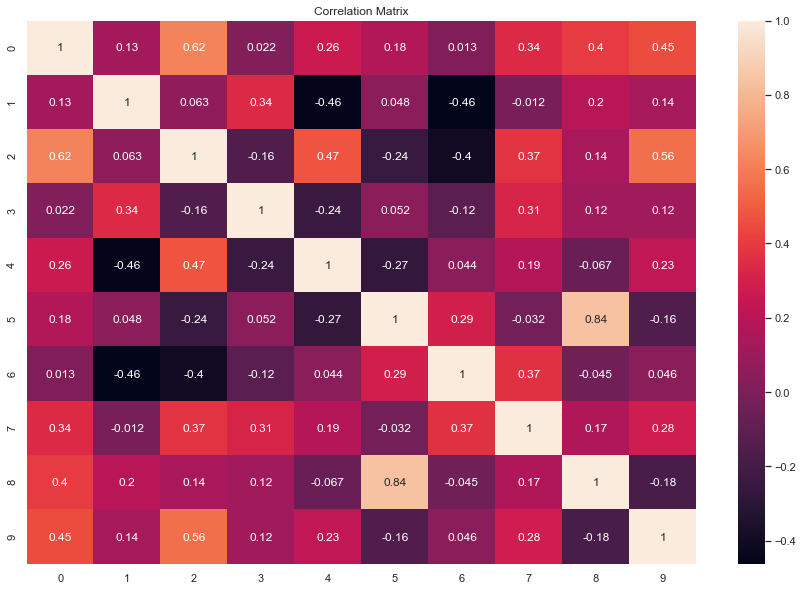

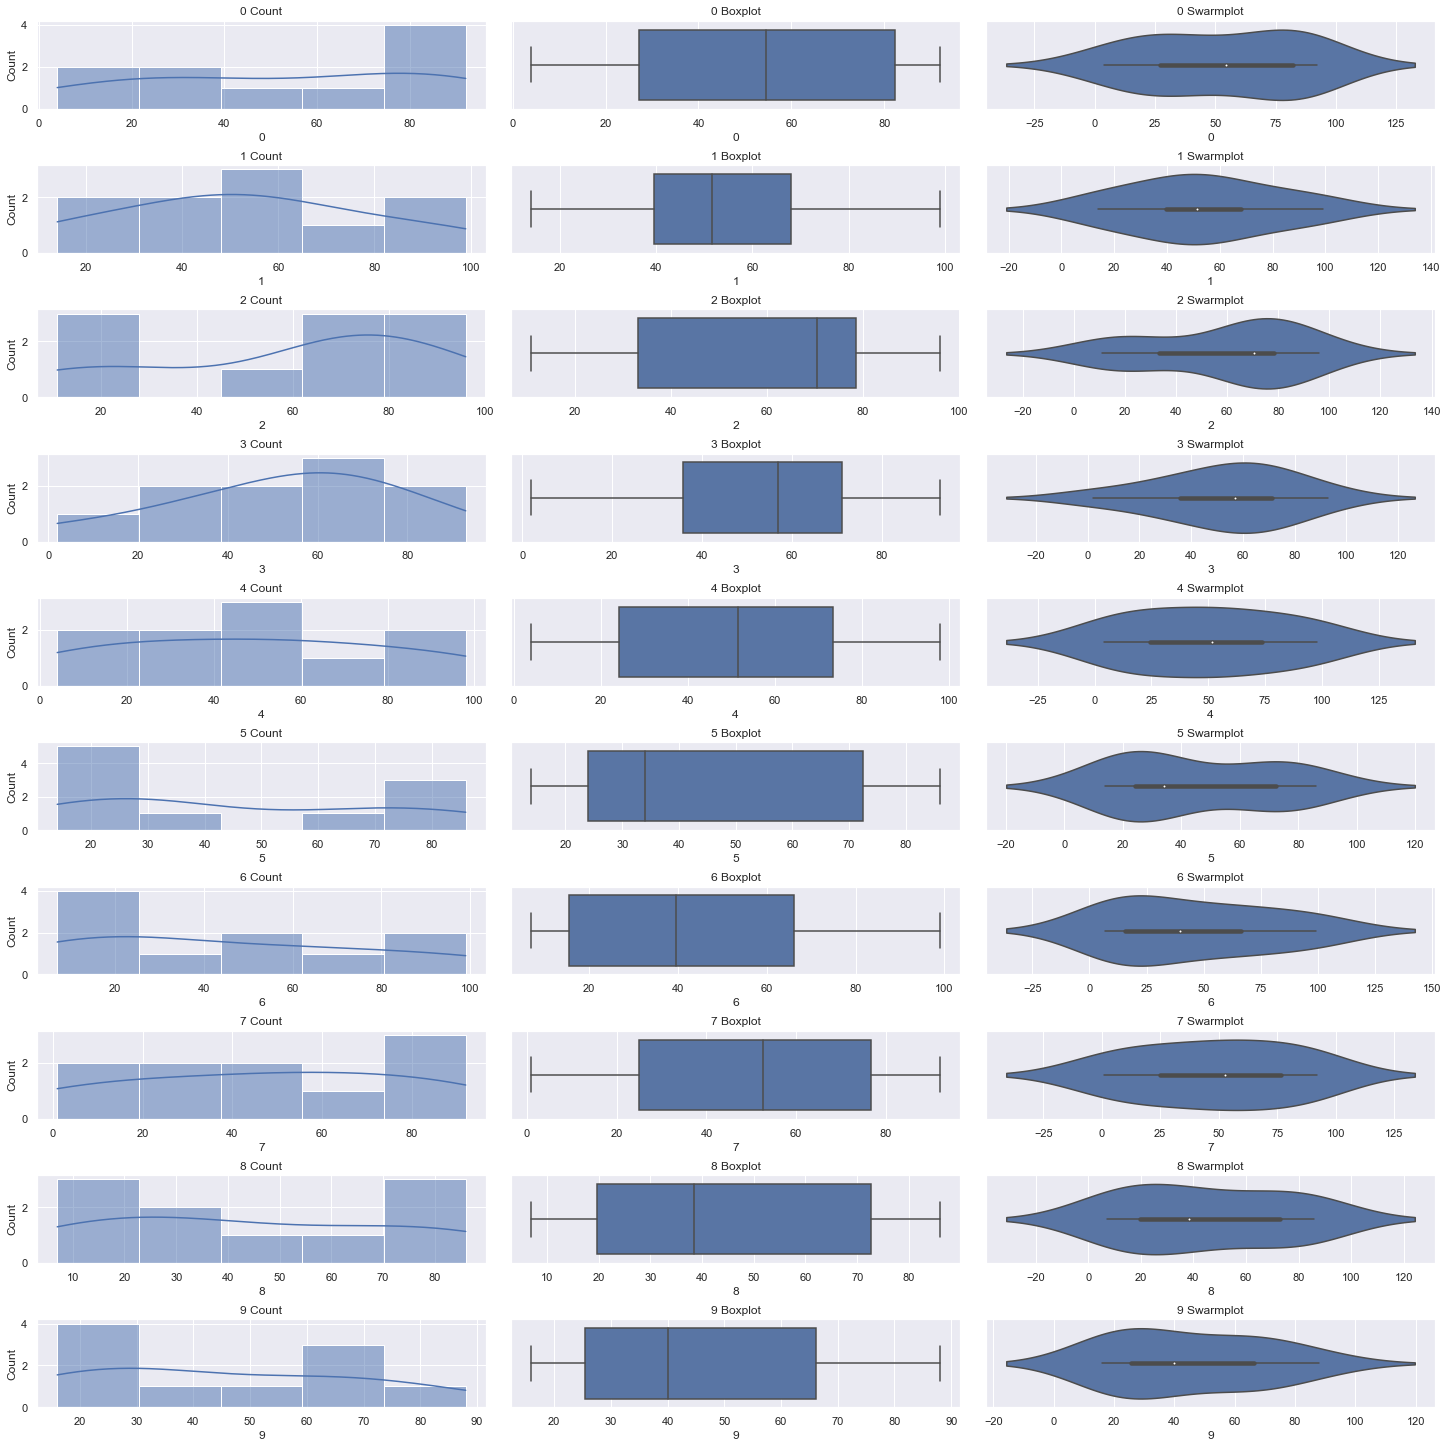

In [9]:
DataOperations().analyze()
DataOperations().visualize()

Data first 5 row:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
-------------------------
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 n

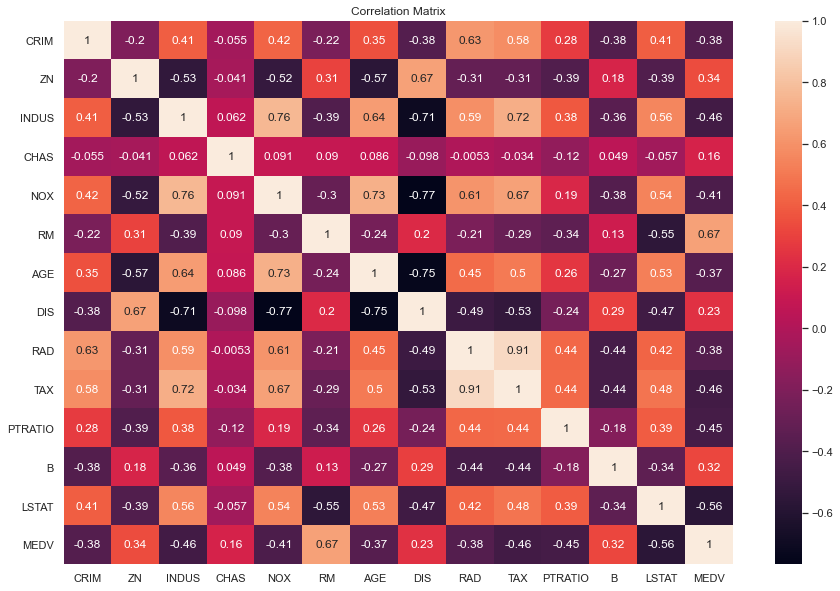

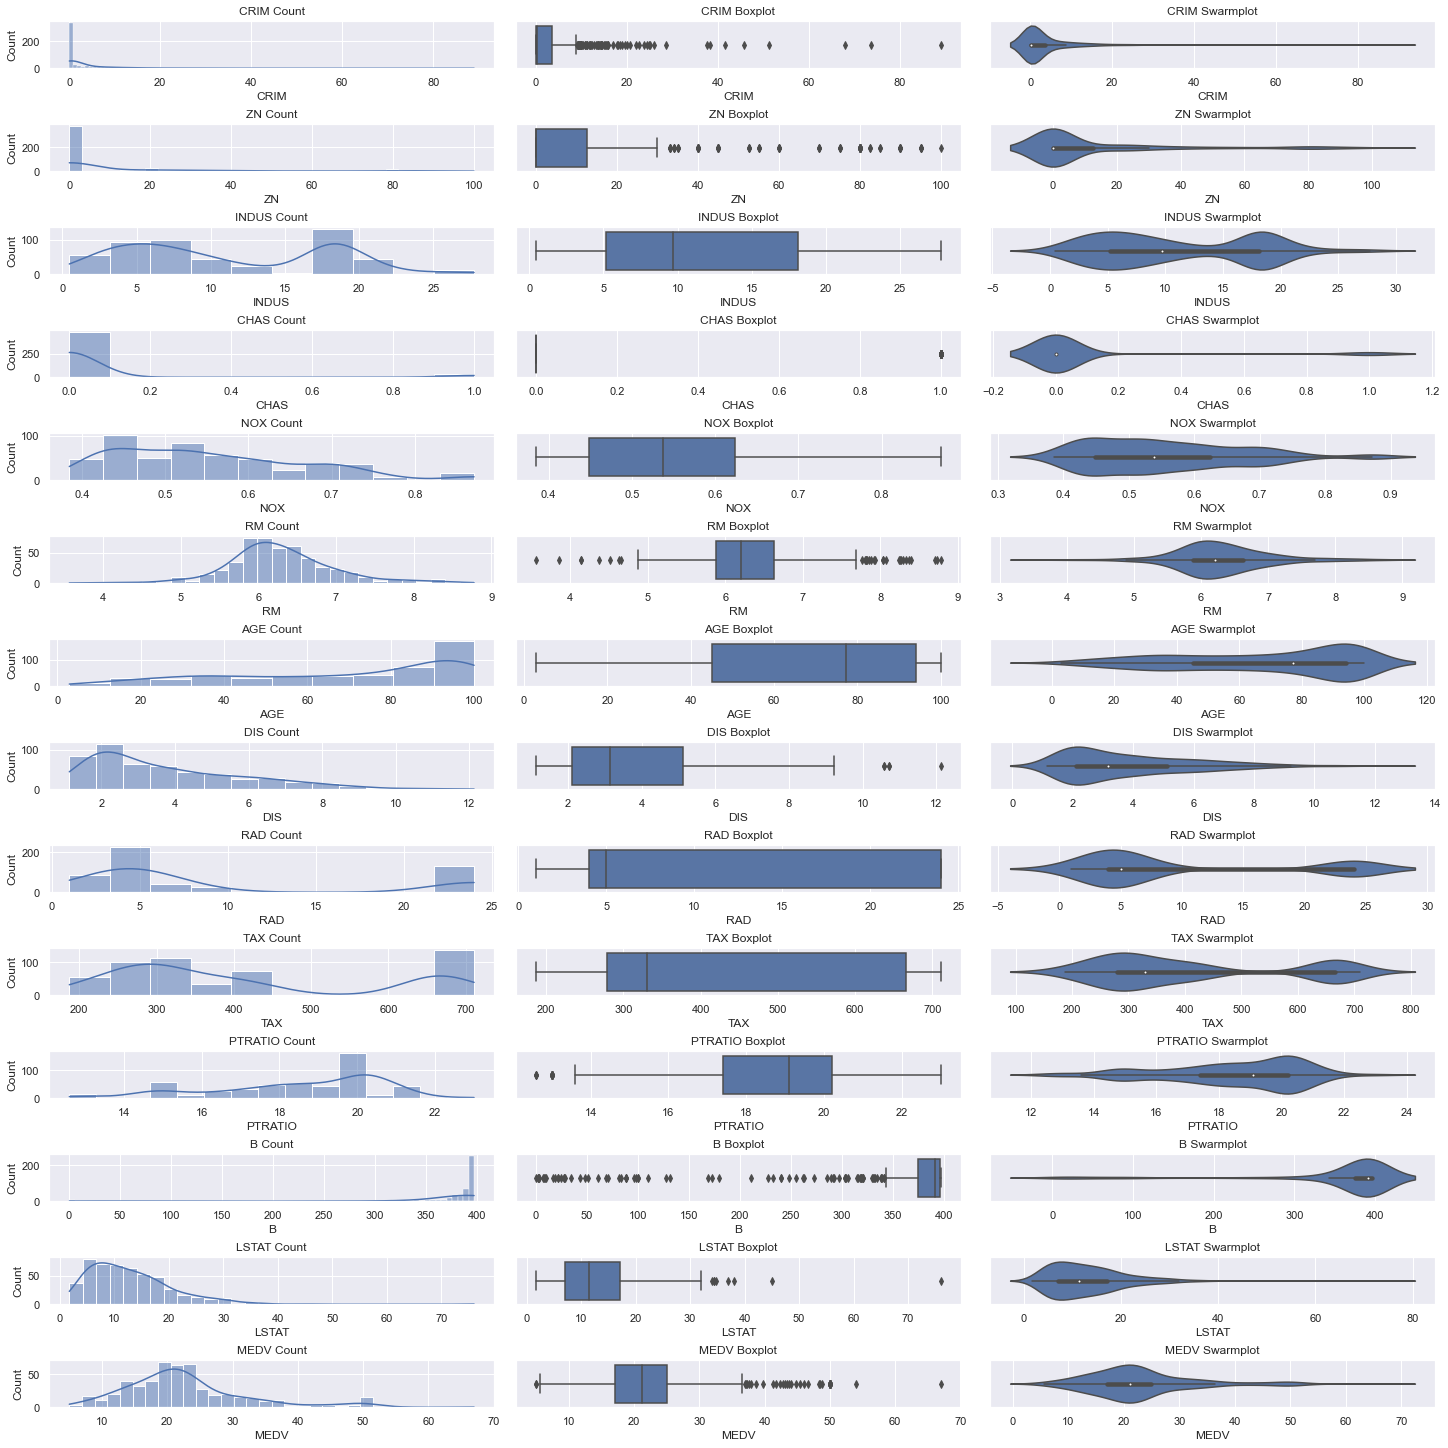

In [10]:
DataOperations("data/house_data.csv").analyze()
DataOperations("data/house_data.csv").visualize()

Data first 5 row:
   gender                      race parental level of education         lunch  \
0  female  {'ethnicity': 'group B'}           bachelor's degree      standard   
1  female  {'ethnicity': 'group C'}                some college      standard   
2  female  {'ethnicity': 'group B'}             master's degree      standard   
3    male  {'ethnicity': 'group A'}          associate's degree  free/reduced   
4    male  {'ethnicity': 'group C'}                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
-------------------------
Data Info:
<class 'pandas.core.frame.DataFrame'>


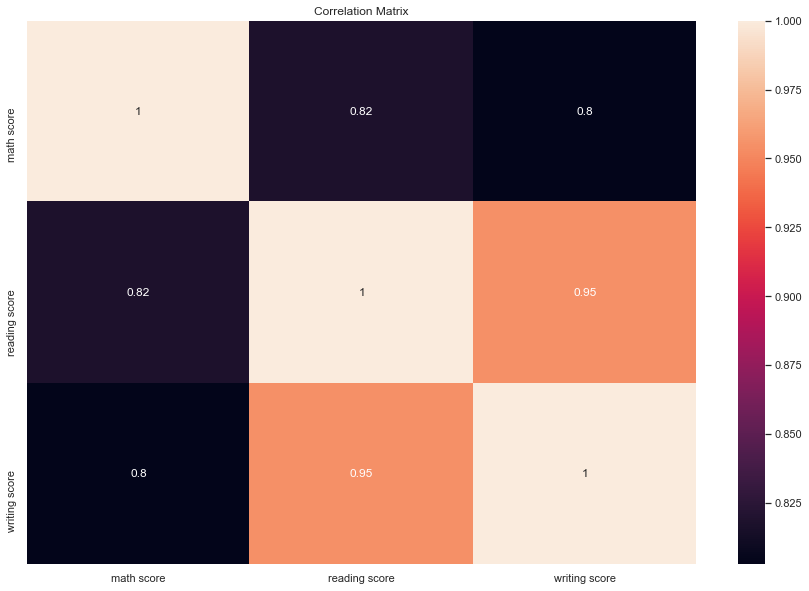

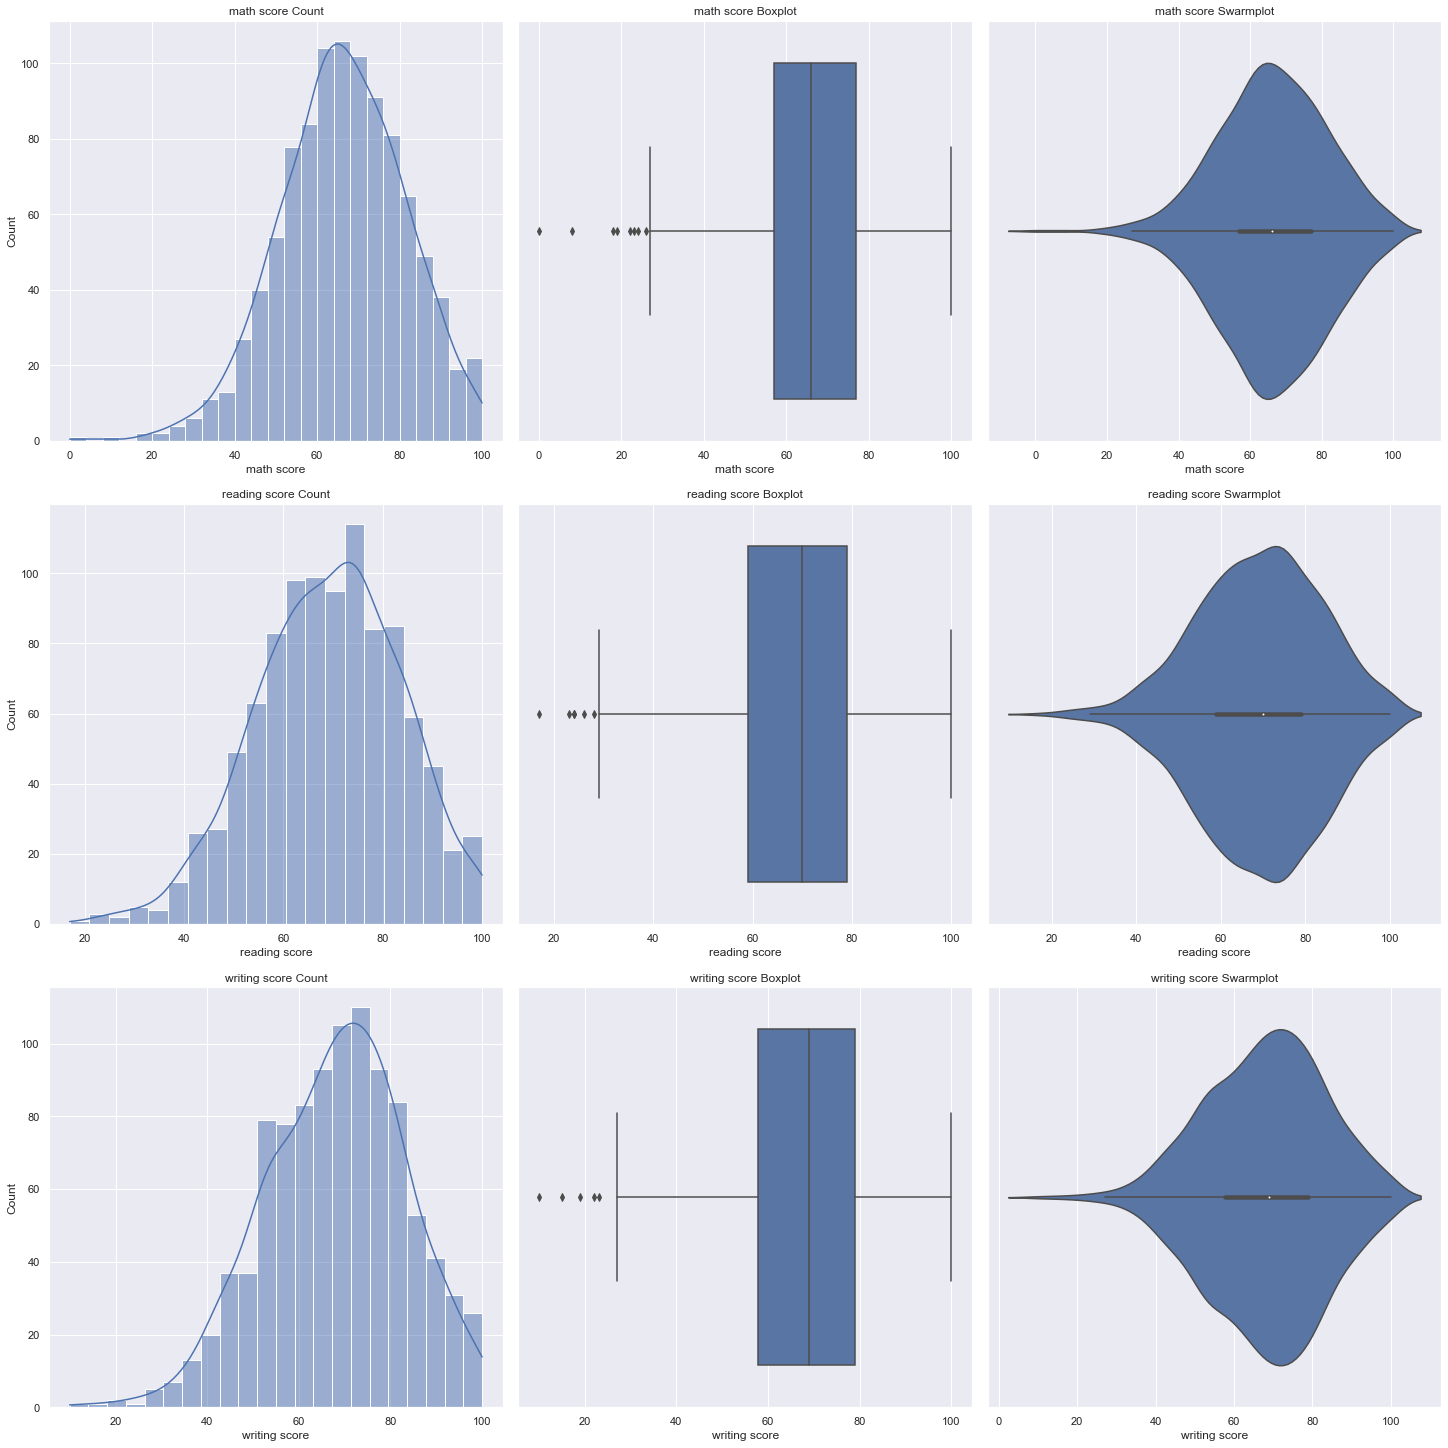

In [11]:
DataOperations("data/studentPerformance.json").analyze()
DataOperations("data/studentPerformance.json").visualize()